In [50]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

#從 google drive 匯入csv檔
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/運算思維報告 /drug200.csv')
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [51]:
labels={
    'drugA':0,
    'drugB':1,
    'drugC':2,
    'drugX':3,
    'drugY':4
}
df['Labels']=df['Drug'].map(labels)

for i in range(len(df['Sex'])):
  if df['Sex'][i]=='M':
    df['Sex'][i]=0;
  else:
    df['Sex'][i]=1;

  if df['BP'][i]=='LOW':
    df['BP'][i]=0;
  elif df['BP'][i]=='NORMAL':
    df['BP'][i]=1;
  else:
    df['BP'][i]=2;

  if df['Cholesterol'][i]=='LOW':
    df['Cholesterol'][i]=0;
  elif df['Cholesterol'][i]=='NORMAL':
    df['Cholesterol'][i]=1;
  else:
    df['Cholesterol'][i]=2;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying t

Figure(1250x625)


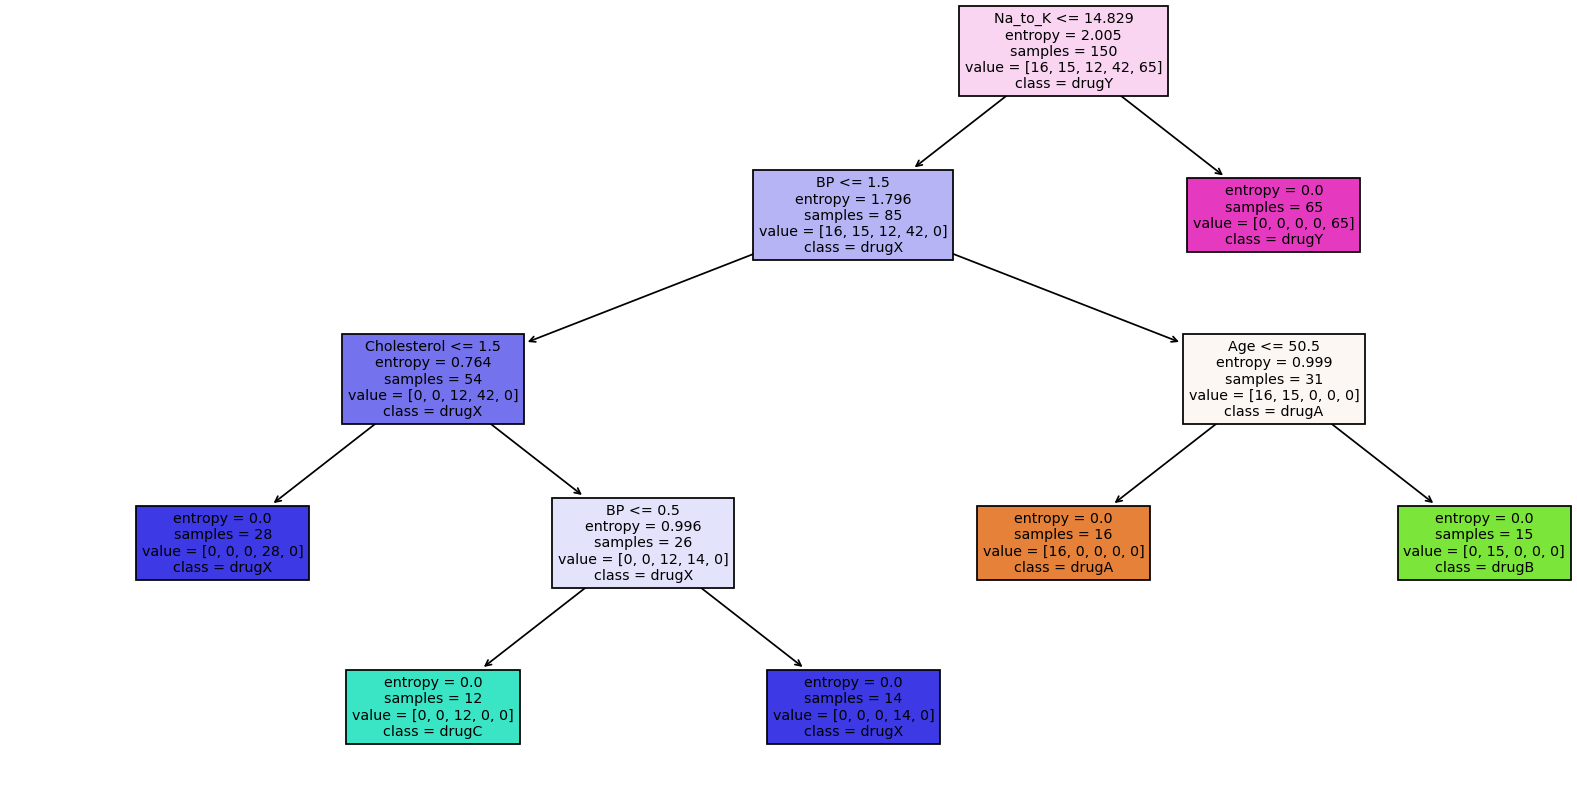

In [53]:
#拆分訓練集與測試集
train_x, test_x, train_y, test_y = train_test_split(drug_features, drug_labels, test_size=0.25)

#建立分類器
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_x,train_y)
graph_tree(clf)

In [52]:
def graph_tree(clf):
  fn=['Age','Sex','BP','Cholesterol','Na_to_K']
  cn=['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
  fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=125)
  tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
  #fig.savefig('imagename.png')
  print(fig)

In [54]:
drug_features = df[['Age','Sex','BP','Cholesterol','Na_to_K']] ##features
drug_labels = df['Labels'] #labels
print('Featueres:\n',drug_features)
print('Target:\n',drug_labels)


Featueres:
      Age Sex BP Cholesterol  Na_to_K
0     23   1  2           2   25.355
1     47   0  0           2   13.093
2     47   0  0           2   10.114
3     28   1  1           2    7.798
4     61   1  0           2   18.043
..   ...  .. ..         ...      ...
195   56   1  0           2   11.567
196   16   0  0           2   12.006
197   52   0  1           2    9.894
198   23   0  1           1   14.020
199   40   1  0           1   11.349

[200 rows x 5 columns]
Target:
 0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Labels, Length: 200, dtype: int64


In [55]:
#無限制 max depth
print('訓練集準確率: ',clf.score(train_x,train_y))
print('測試集準確率: ',clf.score(test_x,test_y))

訓練集準確率:  1.0
測試集準確率:  1.0


In [56]:
accuracy=[]
for i in range(1,6):
  clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(train_x,train_y)
  print(i,'層時，訓練集準確率: ',clf.score(train_x,train_y))
  print(i,'層時，測試集準確率: ',clf.score(test_x,test_y))
  print('--------------------')


1 層時，訓練集準確率:  0.7133333333333334
1 層時，測試集準確率:  0.76
--------------------
2 層時，訓練集準確率:  0.82
2 層時，測試集準確率:  0.9
--------------------
3 層時，訓練集準確率:  0.92
3 層時，測試集準確率:  0.92
--------------------
4 層時，訓練集準確率:  1.0
4 層時，測試集準確率:  1.0
--------------------
5 層時，訓練集準確率:  1.0
5 層時，測試集準確率:  1.0
--------------------
